# Clustering

The code is based in the work of Gael Varoquaux, using scikit-learn functions. Its information is present inside the code. The program finds N clusters in the image provided, where the K values is delimited by the code.

Import the neccesary libraries

In [29]:
print(__doc__)

# Author: Gael Varoquaux <gael.varoquaux@normalesup.org>, Brian Cheung
# License: BSD 3 clause

import time

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
import cv2
import scipy.misc

Automatically created module for IPython interactive environment


Read the images

In [54]:
game = "Asteroids"
NSlice = "2"
name = "Sharp_Images/"+game+"_sharp"+NSlice
face = cv2.imread(name+".png")
face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

Resize the image for faster processing

In [55]:
face = sp.misc.imresize(face, 0.99) / 255.
#from skimage import data, color
#from skimage.transform import rescale, resize, downscale_local_mean
#image = face
#image_resized = resize(image, (image.shape[0] / 4, image.shape[1] / 4))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


Obtain the graphs of the images. The values obtained are the gradient on the edges

In [56]:
graph = image.img_to_graph(face)

The exponential function makes a decreasing function of the gradient

The lower the beta value, the more independend the segmentation

In [57]:
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

Select the number of regions, or clusters, using Spectral clustering

In [60]:
N_REGIONS = 10

Obtain the clusters, using Spectral clustering with K means and Discretize

/usr/local/lib/python3.5/dist-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'contours'
  s)


Sharp_Images/Asteroids_sharp2_Spectral clustering: kmeans 10 Regions
Sharp_Images/Asteroids_sharp2_Spectral clustering: discretize 10 Regions


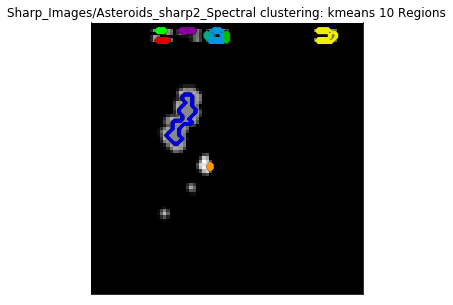

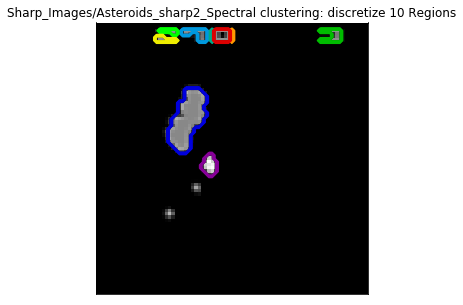

In [61]:
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(face.shape)
    plt.figure(figsize=(5, 5))
    plt.imshow(face, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = name + '_Spectral clustering: ' + str(assign_labels) + " " +str(N_REGIONS) + " Regions"
    print(title)
    plt.title(title)
    #plt.savefig(title +'.png')
plt.show()